# Day 34 Assignment

__Question 1:__

    Use the IRIS dataset and create a decision tree and check the accuracy label.

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset from sklearn
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print("features:",iris.feature_names)

features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print("labels:",iris.target_names)

labels: ['setosa' 'versicolor' 'virginica']


In [5]:
#create a dataframe
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names

In [6]:
#data
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


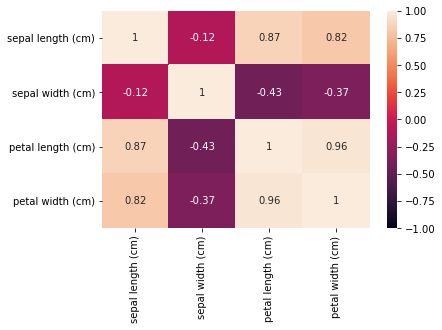

In [9]:
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=+1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002935ECD5880>,
      dtype=object)

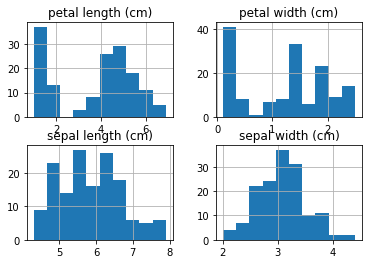

In [10]:
data.hist()

In [11]:
#split the data as train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(iris.data, iris.target, test_size= 0.20, random_state=2)

In [12]:
#fit the data
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
#predictions
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [24]:
#classification_matrix
print("Confusion Matrix")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cmdf = pd.DataFrame(cm,columns=iris.target_names,index=iris.target_names)
cmdf

Confusion Matrix


,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,7,1
virginica,0,1,7


In [29]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [31]:
#accuracy_score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

93.33333333333333


[Text(133.92000000000002, 195.696, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [36, 42, 42]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\nentropy = 1.0\nsamples = 84\nvalue = [0, 42, 42]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 4.95\nentropy = 0.359\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(33.480000000000004, 65.232, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(100.44000000000001, 65.232, 'X[3] <= 1.55\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\nentropy = 0.169\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'entropy = 0.0\nsamples = 3\n

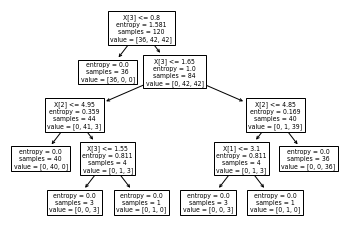

In [32]:
from sklearn import tree
tree.plot_tree(classifier)

In [33]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2

